# Building an SVM Using scikit-learn - Lab

## Introduction

In the previous lab, you learned how to build an SVM from scratch. Next, you'll learn how to use scikit-learn to create SVMs!

## Objectives

You will be able to:
- Use scikit-learn to build a linear SVM when there are 2 groups
- Use scikit-learn to build a linear SVM when there are more than 2 groups

## Generate four data sets in scikit-learn

Let's use the scikit-learn dataset generator again. 
- The first data set contains the same blobs as for the first SVM in the last lab
- The second data set contains the same blobs as for the second SVM (Soft Margin Classifier) in the last lab
- The third data set contains four separate blobs
- The fourth data set contains slightly different data with two classes, yet this time the classes are not blobs but in the shape of half moons (generated using `make_moons`).

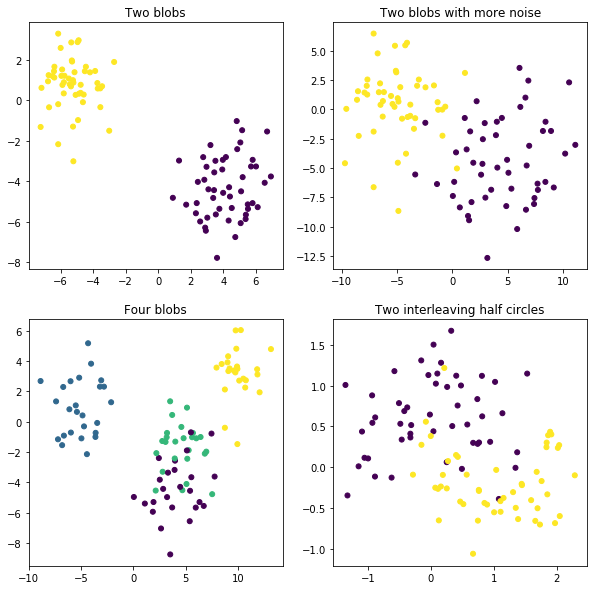

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title("Two blobs")
X_1, y_1 = make_blobs(n_features = 2, centers = 2, cluster_std=1.25, random_state = 123)
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, s=25)

plt.subplot(222)
plt.title("Two blobs with more noise")
X_2, y_2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3,  random_state = 123)
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, s=25)

plt.subplot(223)
plt.title("Four blobs")
X_3, y_3 = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)
plt.scatter(X_3[:, 0], X_3[:, 1], c = y_3, s=25)

plt.subplot(224)
plt.title("Two interleaving half circles")
X_4, y_4 = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)

plt.show()

## A model for a perfectly linearly separable data set

Let's have a look at our first plot again. 

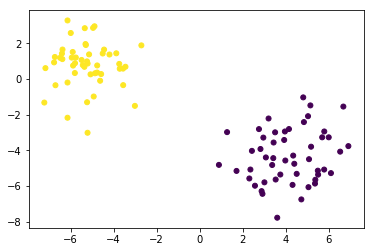

In [2]:
X_1, y_1 = make_blobs(n_features = 2, centers = 2, cluster_std=1.25, random_state = 123)
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, s=25);

We'll start with this data set and fit a simple linear support vector machine on these data. You can use the scikit-learn library `svm` to do so.
- import svm from scikit-learn
- save the SVC-method (which stands for Support Vector Classification) with `kernel='linear'` as the only argument.
- call the `.fit()` method with the data as the first argument and the labels as the second. 


In [3]:
from sklearn import svm

In [4]:
svc =svm.SVC(kernel='linear')
svc.fit(X_1,y_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Let's save the first feature (on the horizontal axis) as X_11 and the second feature (on the vertical axis) as X_12.

In [5]:
svc.coef_

array([[-0.4171222 ,  0.14320341]])

In [6]:
X_11,X_12 = X_1[:,0],X_1[:,1]

In [7]:
# Your code here

Next, let's store the min and maximum values X_11 and X_12 operate in. We'll use these minimum and maximum values to create our plots later. Add some slack (equal to 1) to the minimum and maximum boundaries.

In [8]:
min_1,max_1 = np.min(X_11)-1,np.max(X_11)+1
min_2,max_2 = np.min(X_12)-1,np.max(X_12)+1

Next, we'll create a grid. You can do this by using the numpy function `linspace`, which creates a numpy array with evenly spaced numbers over a specified interval. The default of numbers is 50 and we don't need that many, so let's specify `num = 10` for now. You'll see that you need to take a higher number once we get to classification of more than 2 groups.

In [9]:
ax1=np.linspace(min_1,max_1,10)
ax2=np.linspace(min_2,max_2,10)

To create our decision boundary, you'll need to create a mesh of points to plot in. You can do this by using `np.meshgrid` with the two arguments equal to the `np.linspace` objects created for X11 and X12.

In [10]:
x11c,x12c=np.meshgrid(ax1,ax2)

Now we want to create a numpy array of the shape (100, 2) that concatenates the coordinates for X11 and X12 together in one numpy object. Use `np.c_` and make sure to use `.ravel()` first. Use `np.shape()` on your resulting object first to verify the resulting shape.

In [11]:
combined = np.c_[x11c.ravel(),x12c.ravel()]

In [12]:
combined.shape

(100, 2)

In [13]:
# Your code here

Bow we want to get a decision boundary for this particular data set. Using your (100,2) numpy array and calling `clf.decision_function()` on it, the decision function returns the distance to the samples that you generated using meshgrid. Make sure you change your shape in a way that you get a (10,10) numpy array.

In [14]:
svc.decision_function(combined).shape = (10,10)

In [15]:
svc.decision_function

<bound method BaseSVC.decision_function of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)>

Now, let's plot our data again with the result of svm in it. 
- The first line is simply creating the scatter plot like before
- Next, you need to specify that what you will do next uses the same axes as the scatter plot. You can do this using `plot.gca()`. Store it in an object and for the remainder you'll use this object to create the lines in your plot
- Use `.countour()`. The first two argument are the coordinates created usiung the meshgrid, the third argument the result of your decision function call. 
- You'll want three lines: one decision boundary, and the 2 lines going through the support vectors. Incluse `levels = [-1,0,1]` to get all three.

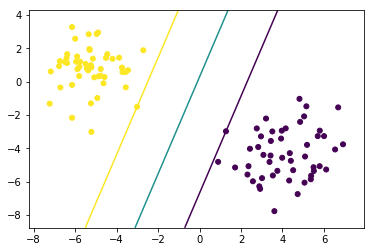

In [16]:
plt.scatter(X_11, X_12, c = y_1, s=25);
m_plot = plt.gca()
m_plot.contour(ax1,ax2,svc.decision_function(combined).reshape((10,10)),levels=[-1,0,1])

In [17]:
# Your code here

The coordinates of the support vectors can be found in the `support_vectors_`-attribute. Have a look:

In [18]:
sv1,sv2=svc.support_vectors_

In [19]:
# Your code here

Now create your plot again but highlight your support vectors. 

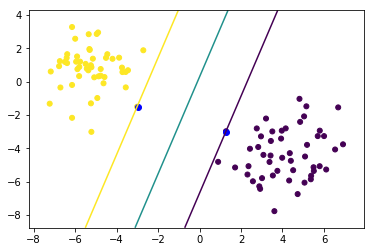

In [20]:
plt.scatter(X_11, X_12, c = y_1, s=25);
m_plot = plt.gca()
m_plot.contour(ax1,ax2,svc.decision_function(combined).reshape((10,10)),levels=[-1,0,1])
m_plot.scatter(sv1,sv2,c='b');

In [21]:
# Your code here

## When the data is not linearly separable

The previous example was pretty easy. The 2 "clusters" were easily separable by one straight line classifying every single instance correctly. But what if this isn't the case? Let's have a look at the second dataset we had generated.

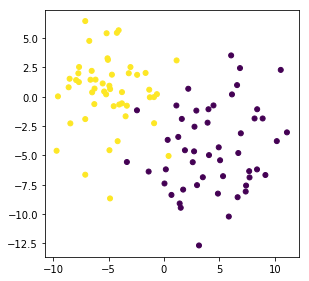

In [22]:
plt.figure(figsize=(10, 10))
plt.subplot(222)
X_2, y_2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3,  random_state = 123)
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, s=25);

In [23]:
# Your code here

Unlike what we've seen in the previous lab, we can just simply use the same SVC function to this problem, as this algorithm automatically allows for slack variables. Repeat the code from above here, and plot the result.

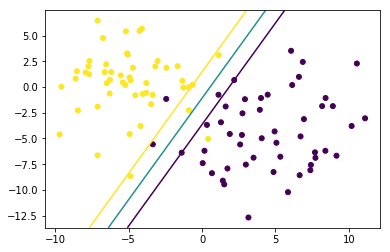

In [24]:
svc =svm.SVC(kernel='linear')
svc.fit(X_2,y_2)
X_21,X_22 = X_2[:,0],X_2[:,1]
min_21,max_21 = np.min(X_21)-1,np.max(X_21)+1
min_22,max_22 = np.min(X_22)-1,np.max(X_22)+1
ax21=np.linspace(min_21,max_21,10)
ax22=np.linspace(min_22,max_22,10)
x21c,x22c=np.meshgrid(ax21,ax22)
combined = np.c_[x21c.ravel(),x22c.ravel()]
plt.scatter(X_21, X_22, c = y_2, s=25);
m_plot = plt.gca()
m_plot.contour(ax21,ax22,svc.decision_function(combined).reshape((10,10)),levels=[-1,0,1]);

In [25]:
# Your code here

As you can see, 3 instances are misclassified (1 yellow, 2 purple). We probably can't do better in this situation, but it's worth to look at changing your hyperparameter C, which can be done in the .SCV command, adding a high value for the argument `C`. Set C = 5,000,000. 

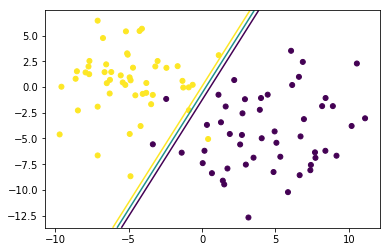

In [26]:
svc =svm.SVC(kernel='linear',C=5000000)
svc.fit(X_2,y_2)
X_21,X_22 = X_2[:,0],X_2[:,1]
min_21,max_21 = np.min(X_21)-1,np.max(X_21)+1
min_22,max_22 = np.min(X_22)-1,np.max(X_22)+1
ax21=np.linspace(min_21,max_21,10)
ax22=np.linspace(min_22,max_22,10)
x21c,x22c=np.meshgrid(ax21,ax22)
combined = np.c_[x21c.ravel(),x22c.ravel()]
plt.scatter(X_21, X_22, c = y_2, s=25);
m_plot = plt.gca()
m_plot.contour(ax21,ax22,svc.decision_function(combined).reshape((10,10)),levels=[-1,0,1]);

In [27]:
# Your code here

## Other options in Scikit Learn



When you dig deeper in Scikit Learn, you'll notice that there are several ways to get to linear SVM's for classification:

- `svm.SVC(kernel = "linear")` , which we've used so far. Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). 
- `svm.LinearSVC()`, which is very similar to the simple SVC method, but:
    - which does not allow for the keyword "kernel", as it is assumed to be linear (more on non-linear kernels later)
    - In the objective function, `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.
    - `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while `SVC` uses the One-vs-One multiclass reduction (this is important only when having >2 classes!)
- `svm.NuSVC()`, which is again very similar,
    - Does have a "kernel" argument
    - `SVC` and `NuSVC` are essentially the same thing, except that for `nuSVC`, C is reparametrized into nu. The advantage of this is that where C has no bounds and can be any positive number, nu always lies between 0 and 1. 
    - One-vs-one multiclass approach.
    
    
So what does One-vs-one mean? what does One-vs-all mean?
- One-vs-one means that with $n$ classes, $\dfrac{(n)*(n-1)}{2}$ boundaries are constructed! 
- One-vs-all means that when there are $n$ classes, $n$ boundaries are created.

The difference between these three types of classifiers is mostly small, but generally visible for data sets with 3+ classes. Let's have a look at our third example and see how the results differ!

## Classifying four classes

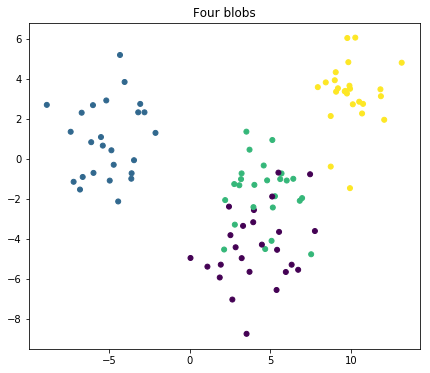

In [28]:
plt.figure(figsize=(7, 6))

plt.title("Four blobs")
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25);

Try four different models and plot the results using subplots where:
    - The first one is a regular SVC (C=1)
    - The second one is a regular SVC with C=0.1
    - The third one is a NuSVC with nu= 0.7
    - The fourth one is a LinearSVC (no arguments)
    
Make sure all these plots have highlighted support vectors, except for LinearCSV (this algorithm doesn't have the attribute `.support_vectors_`. Here, instead of contour() use contourf() to get filled contour plots.

In [29]:
combined.shape

(100, 2)

In [30]:
svc.decision_function(combined).shape

(100,)

In [38]:
svc.decision_function(combined).size

400

ValueError: cannot reshape array of size 400 into shape (10,10)

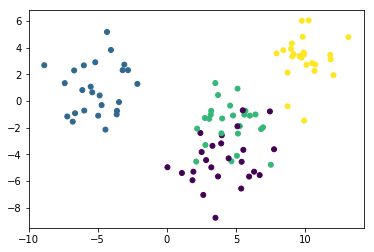

In [35]:
svc =svm.SVC(kernel='linear',C=1)
svc.fit(X,y)
X_1,X_2 = X[:,0],X[:,1]
min_1,max_1 = np.min(X_1)-1,np.max(X_1)+1
min_2,max_2 = np.min(X_2)-1,np.max(X_2)+1
ax1=np.linspace(min_1,max_1,10)
ax2=np.linspace(min_2,max_2,10)
x1c,x2c=np.meshgrid(ax1,ax2)
combined = np.c_[x1c.ravel(),x2c.ravel()]
plt.scatter(X_1, X_2, c = y, s=25);
m_plot = plt.gca()
m_plot.contour(x1c,x2c,svc.decision_function(combined).reshape((10,10)),levels=[-1,0,1]);

In [32]:
svc =svm.SVC(kernel='linear',C=5000000)
svc.fit(X_2,y_2)
X_21,X_22 = X_2[:,0],X_2[:,1]
min_21,max_21 = np.min(X_21)-1,np.max(X_21)+1
min_22,max_22 = np.min(X_22)-1,np.max(X_22)+1
ax21=np.linspace(min_21,max_21,10)
ax22=np.linspace(min_22,max_22,10)
x21c,x22c=np.meshgrid(ax21,ax22)
combined = np.c_[x21c.ravel(),x22c.ravel()]
plt.scatter(X_21, X_22, c = y_2, s=25);
m_plot = plt.gca()
m_plot.contour(ax21,ax22,svc.decision_function(combined).reshape((10,10)),levels=[-1,0,1]);

ValueError: Expected 2D array, got 1D array instead:
array=[-5.65602113 -2.56630775 -1.54324504 -1.26916312 -3.17605696 -3.29793978
 -3.65931506 -5.39701688  6.0319376  -4.97217534 -0.34072581  3.51923362
  2.68985873 -5.55411368 -1.09188543  5.18358167 -6.56310242 -4.54086065
  3.36593509  2.31798848 -3.35912392 -1.08391023 -1.32952687 -1.0014679
 -2.42124371  0.82464805 -1.02032064 -5.93927444  2.67607852 -5.2976157
  2.31787384 -0.72922949 -7.04148449 -1.00544683  2.73732365 -1.15525909
  1.08092279 -1.87719899  6.05168176 -0.77835556 -4.10652639  1.28940135
 -4.51703193  3.92055974  3.34788075  3.64864596 -8.75495587 -2.13832531
  2.84751548 -0.71114846  2.91087448  0.41961309 -0.73587241  3.12229729
 -2.10427098 -0.91374163 -2.39588683 -0.73828657  3.25756025 -1.30857843
 -1.09572935  3.83411327 -4.96347351 -4.77794402  3.49480633  1.94455244
 -3.61655384 -1.02317228 -4.29614209  2.73962624  3.46751321 -5.66399794
 -3.82340958  1.35168138  2.29807565 -2.44014909 -1.89204206  0.93340032
  1.3455339  -1.97024262  2.71863423 -0.69618396  4.82375329  2.25911807
 -5.2994565   0.65334808 -0.39469259 -2.06983124  3.57640183 -0.30355259
  2.13170244  4.32312956  4.79786986 -4.55503039 -4.42874765  3.81324636
  0.45072048 -0.07589499 -1.47309324  3.38625258].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Your code here

Now, let's have a look at the coefficients of the decision boundaries. Remember that a simple `SVC` uses a one-vs-one method. this means that for 4 classes, $\dfrac{(4 * 3)}{2}= 6$ decision boundaries are created. The coefficients can be accessed in the attribute `.coef_`. Compare with the coefficients for the LinearSVC. What do you notice?

In [ ]:
# Your code here

## To non-linear boundaries

In [ ]:
plt.title("Two interleaving half circles")
X_4, y_4 = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)

plt.show()

Let's look at our fourth plot. We can try and draw a line here,  but it's pretty apparent that a linear boundary is not appropriate here. In the next section you'll learn about SVMs with non-linear boundaries!

## Additional reading

It is highly recommended to read up on SVMs in the scikit-learn documentation!
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html

## Summary

You now know how to use scikit-learn to build linear support vector machines. In the next lesson, you'll learn how SVMs can be extended to have non-linear boundaries.